In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from scipy import io
import numpy as np

b1 = io.loadmat('/content/drive/MyDrive/Colab Notebooks/S2T2B1.mat')
b2 = io.loadmat('/content/drive/MyDrive/Colab Notebooks/S2T2B2.mat')
x1 = b1['a']
x2 = b2['a']
y1= np.zeros((1,45))
y2= np.ones((1,45))  

In [ ]:
X= np.zeros((90,126,3500))
X[0:45,:,:] = x1
X[45:90,:,:] = x2
Y= np.zeros((90))
Y[0:45] = y1
Y[45:90] = y2
z=np.zeros((90,126,140,25))
for i in range(90):
  for j in range(126):
    for k in range(140):
      z[i,j,k,0:25]=X[i,j,k*25:25*(k+1)]

# which mood is better for wavelet transform?

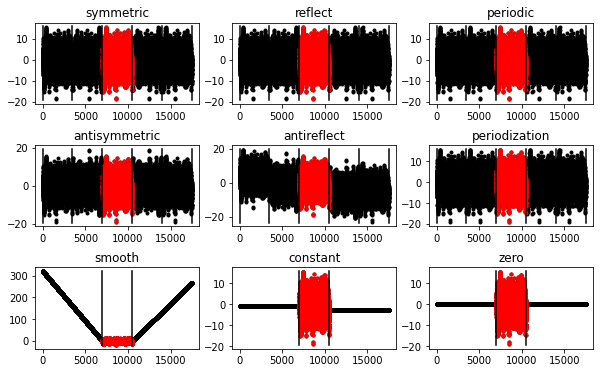

In [ ]:
b1=X[1,59,:]
from pywt._doc_utils import boundary_mode_subplot
from matplotlib import pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
boundary_mode_subplot(b1, 'symmetric', axes[0], symw=False)
boundary_mode_subplot(b1, 'reflect', axes[1], symw=True)
boundary_mode_subplot(b1, 'periodic', axes[2], symw=False)
boundary_mode_subplot(b1, 'antisymmetric', axes[3], symw=False)
boundary_mode_subplot(b1, 'antireflect', axes[4], symw=True)
boundary_mode_subplot(b1, 'periodization', axes[5], symw=False)
boundary_mode_subplot(b1, 'smooth', axes[6], symw=False)
boundary_mode_subplot(b1, 'constant', axes[7], symw=False)
boundary_mode_subplot(b1, 'zero', axes[8], symw=False)

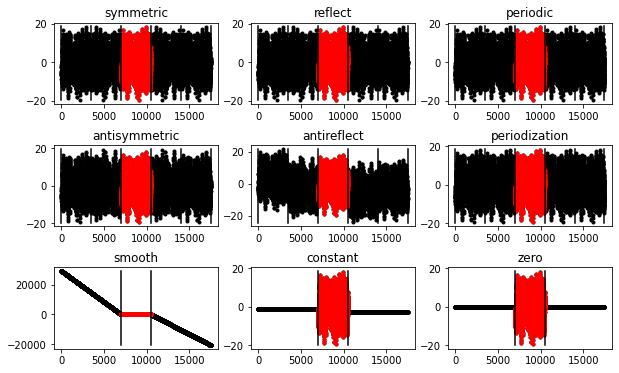

In [ ]:
b1=X[20,59,:]
from pywt._doc_utils import boundary_mode_subplot
from matplotlib import pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
boundary_mode_subplot(b1, 'symmetric', axes[0], symw=False)
boundary_mode_subplot(b1, 'reflect', axes[1], symw=True)
boundary_mode_subplot(b1, 'periodic', axes[2], symw=False)
boundary_mode_subplot(b1, 'antisymmetric', axes[3], symw=False)
boundary_mode_subplot(b1, 'antireflect', axes[4], symw=True)
boundary_mode_subplot(b1, 'periodization', axes[5], symw=False)
boundary_mode_subplot(b1, 'smooth', axes[6], symw=False)
boundary_mode_subplot(b1, 'constant', axes[7], symw=False)
boundary_mode_subplot(b1, 'zero', axes[8], symw=False)

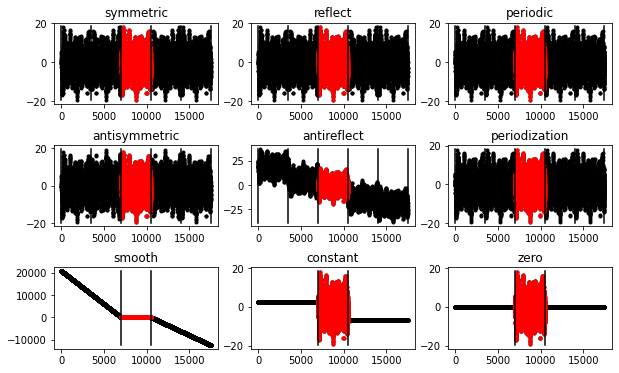

In [ ]:
b1=X[10,59,:]
from pywt._doc_utils import boundary_mode_subplot
from matplotlib import pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
boundary_mode_subplot(b1, 'symmetric', axes[0], symw=False)
boundary_mode_subplot(b1, 'reflect', axes[1], symw=True)
boundary_mode_subplot(b1, 'periodic', axes[2], symw=False)
boundary_mode_subplot(b1, 'antisymmetric', axes[3], symw=False)
boundary_mode_subplot(b1, 'antireflect', axes[4], symw=True)
boundary_mode_subplot(b1, 'periodization', axes[5], symw=False)
boundary_mode_subplot(b1, 'smooth', axes[6], symw=False)
boundary_mode_subplot(b1, 'constant', axes[7], symw=False)
boundary_mode_subplot(b1, 'zero', axes[8], symw=False)

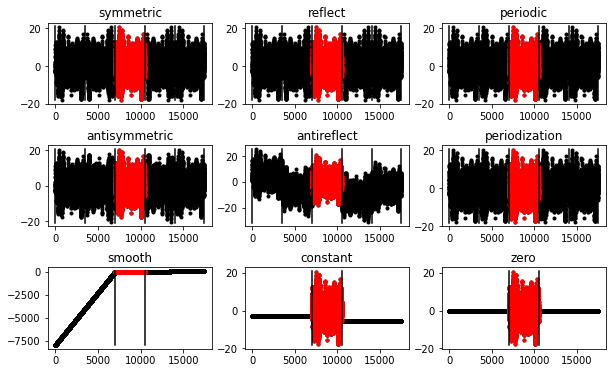

In [ ]:
b1=X[50,59,:]
from pywt._doc_utils import boundary_mode_subplot
from matplotlib import pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
axes = axes.ravel()
boundary_mode_subplot(b1, 'symmetric', axes[0], symw=False)
boundary_mode_subplot(b1, 'reflect', axes[1], symw=True)
boundary_mode_subplot(b1, 'periodic', axes[2], symw=False)
boundary_mode_subplot(b1, 'antisymmetric', axes[3], symw=False)
boundary_mode_subplot(b1, 'antireflect', axes[4], symw=True)
boundary_mode_subplot(b1, 'periodization', axes[5], symw=False)
boundary_mode_subplot(b1, 'smooth', axes[6], symw=False)
boundary_mode_subplot(b1, 'constant', axes[7], symw=False)
boundary_mode_subplot(b1, 'zero', axes[8], symw=False)

# use wavelet transform for feature extraction

In [ ]:
import pywt
f1,f2=pywt.dwt(z, 'db4','smooth')
fwt=np.stack((f1,f2),axis=4)
nsamples, nx, ny, nz , nw = fwt.shape
fwt = fwt.reshape((nsamples,nx*ny*nz*nw))

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate a give model using cross-validation
def evaluate_model(model, x, y):
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores))) 
    return scores

##classifiers

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
import pywt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(evaluate_model(GaussianNB(), fwt, Y))
print(evaluate_model(LogisticRegression(), fwt, Y))
print(evaluate_model(MLPClassifier(random_state=0, hidden_layer_sizes=(50,), max_iter=1000), fwt, Y))
print(evaluate_model(KNeighborsClassifier(n_neighbors=3), fwt, Y))
print(evaluate_model(DecisionTreeClassifier(random_state=0), fwt, Y))
print(evaluate_model(SVC(), fwt, Y))

# use librosa library for feature extraction

In [ ]:
import librosa
b=z[1,1,1,:]
#mfccs=np.mean(librosa.feature.mfcc(y=b, sr=10, n_mfcc=1).T, axis=0)
mfccs=librosa.feature.mfcc(y=b, sr=500, n_mfcc=10).T
print(mfccs.shape)
mfccs

(1, 10)


array([[335.4912489 ,  47.92783319,  -8.39669189, -20.92814369,
        -21.54460954,  -7.91140347,  -1.73953711,   6.15146495,
         -0.53382355,  -7.19044918]])

In [ ]:
f=np.zeros((90,126,140,10))
import librosa
for i in range(90):
  for j in range(126):
    for k in range(140):
      b=z[i,j,k,:]
      #f[i,j,k,1]=librosa.feature.rms(b,hop_length=26)
      a=librosa.feature.mfcc(y=b, sr=500, n_mfcc=10).T
      f[i,j,k,:]=a

KeyboardInterrupt: ignored

In [ ]:
print(evaluate_model(GaussianNB(), f, Y))
print(evaluate_model(LogisticRegression(), f, Y))
print(evaluate_model(MLPClassifier(random_state=0, hidden_layer_sizes=(50,), max_iter=1000), f, Y))
print(evaluate_model(KNeighborsClassifier(n_neighbors=3), f, Y))
print(evaluate_model(DecisionTreeClassifier(random_state=0), f, Y))
print(evaluate_model(SVC(), f, Y))

ValueError: ignored

**MLP Classifier**

In [ ]:
MLP = MLPClassifier(random_state=0, hidden_layer_sizes=(128,), max_iter=1000)
MLP.fit(X_train, y_train)

# predicting on test set
y_test_pred = MLP.predict(X_test)
y_train_pred = MLP.predict(X_train)

# calculate the accuracy
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)
train_accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, average='macro')


print("MLP acc on test set: %", round(100*test_accuracy,2))
print("MLP acc on train set: %", round(100*train_accuracy,2))
print("precision, recall, fscore =",round(precision,2), round(recall,2), round(fscore,2))

MLP acc on test set: % 27.78
MLP acc on train set: % 100.0
precision, recall, fscore = 0.27 0.33 0.26
